In [301]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

Zadanie 1

a)

In [302]:
np.random.seed(105454441)

x = np.dot(np.random.rand(2, 2), np.random.rand(2, 200)).T

b)

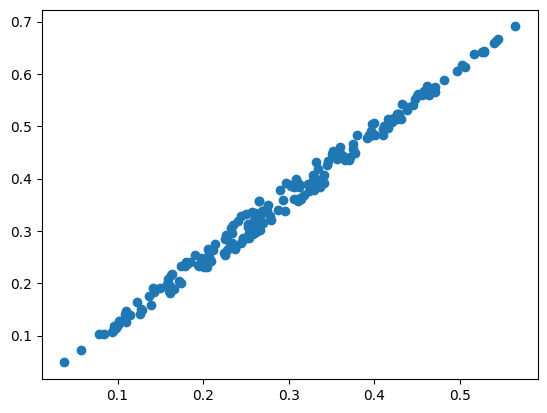

In [303]:
plt.scatter(x[:, 0], x[:, 1]);

c)

In [304]:
def wiPCA(x, n_components = 2):
    mean = np.mean(x)
    x_m = x - mean
    cov_matrix = np.cov(x_m.T)

    eigen_val, eigen_vec = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigen_val)[::-1]
    eigen_val, eigen_vec = eigen_val[sorted_indices], eigen_vec[:, sorted_indices]

    principal_components = eigen_vec[:, : n_components]

    x_pca = np.dot(x_m, principal_components)

    return x_pca, eigen_val, eigen_vec, principal_components


def wiPCA_reconstruct(x_reduced, principal_components, mean):
    x_reconstructed = np.dot(x_reduced, principal_components.T) + mean
    
    return x_reconstructed


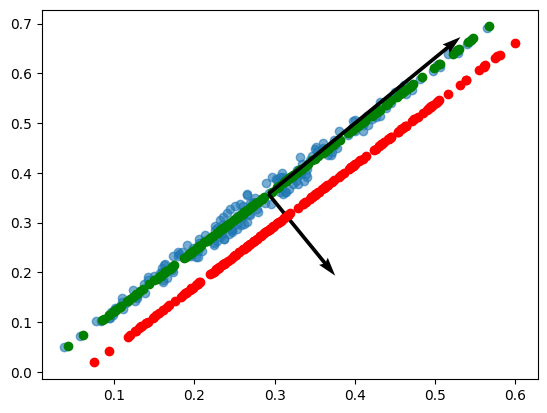

In [305]:
x_reduced, eigen_val, eigen_vec, principal_components = wiPCA(x, 1)
origin = [np.mean(x[:, 0]), np.mean(x[:, 1])]

eig_vec1 = eigen_vec[0,:]
eig_vec2 = eigen_vec[1,:]
plt.scatter(x[:, 0], x[:, 1], alpha=0.6);
# plt.scatter(x[:, 0], x_reduced);

pca = PCA(n_components=len(x_reduced[0])).fit(x)
X_new = pca.inverse_transform(x_reduced)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=1, c='g')

plt.quiver(*origin, *eig_vec1, color='k', scale_units='height', scale=3.5)
plt.quiver(*origin, *eig_vec2, color='k', scale_units='width', scale=2)

mu = np.mean(x, axis=0)
x_reconstructed = np.dot(x_reduced, principal_components.T) + mu
plt.scatter(x_reconstructed[:, 0], x_reconstructed[:, 1], alpha=1, c='r')

# principal_components = np.split(principal_components[0], 1)


Zadanie 2